<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de PSO

## Clasificación usando regresión logística optimizada por un pso.

La regresión logística es un algoritmo de aprendizaje automático que se utiliza para hacer predicciones para encontrar el valor de una variable dependiente, como la de predecir si un tumor es maligno o benigno, la clasificación del correo electrónico (spam o no spam) o la admisión a una universidad (admitido o no admitido), este algoritmo va aprendiendo de variables independientes (varias características relevantes para el problema).

Por ejemplo, para clasificar un correo electrónico, el algoritmo utilizará las palabras del correo electrónico como características y, en función de eso, hará una predicción de si el correo electrónico es spam o no.

In [1]:
import numpy as np
import pandas as pd

### Codificando Regresión Logística

In [2]:
marks_df = pd.read_csv('Data/exdata1.csv')
marks_df

,0,1,2
0,0.131117,-0.694103,0.0
1,0.567389,0.339034,0.0
2,2.855025,2.971203,1.0
3,0.541739,0.560591,0.0
4,0.073822,-0.335345,0.0
...,...,...,...
195,2.838675,2.946874,1.0
196,0.479348,0.361812,0.0
197,2.032113,3.419321,1.0
198,3.537026,3.091923,1.0


Una regresión Linea puede representarse como:

$$\hat{f}(x) = \beta^T X$$

Aplicando la función sigmoide a la salida de la regresión logística:

$$\hat{f}(x) = \sigma(\beta^T X)$$

Donde la función sigmoide está definida como:

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

Entonces el modelo de regresión logística nos queda:

$$\hat{f}(x) = \frac{1}{1+e^{-\beta^T X}}$$


Si la suma ponderada de las entradas es mayor que cero, la clase predicha es 1 y viceversa. Entonces, el límite de decisión que separa ambas clases se puede encontrar al establecer la suma ponderada de las entradas en 0.

$$
\hat{f}(\textbf{x}) = \begin{cases}  \textrm{>0.5, si  }  \beta^T X \geq 0 \\ \\  \textrm{<0.5, si  } \beta^T X < 0\\ \end{cases}
$$

#### Función de costo

Al igual que la regresión lineal, se define una función de costo para nuestro modelo y el objetivo será minimizar el costo.

$$
cost = \begin{cases}  -\log{\hat{f}(x)}, \textrm{si  }  y=1 \\ \\  -\log{(1 - \hat{f}(x)}), \textrm{si  }  y=0 \\ \end{cases}
$$

#### Intuición de la función de costo

Si la clase de los datos reales es 1 y el modelo predice 0, deberíamos penalizar al modelo y viceversa. Como se puede ver en la figura de abajo, para la gráfica $-\log(\hat{f}(x))$ cuando $\hat{f}(x)$ se acerca a 1, el costo es 0 y cuando h(x) se acerca a 0, el costo es infinito (es decir, penalizamos fuertemente el modelo). De manera similar, para la gráfica $-\log(1-\hat{f}(x))$ cuando el valor real es 0 y el modelo predice 0, el costo es 0 y el costo se vuelve infinito cuando $\hat{f}(x)$ se acerca a 1.

<img style="float: center;;" src='Figures/log_reg.png' width="400" height="100"/></a>

In [3]:
X = marks_df.iloc[:,:-1]
y = marks_df.iloc[:,-1]

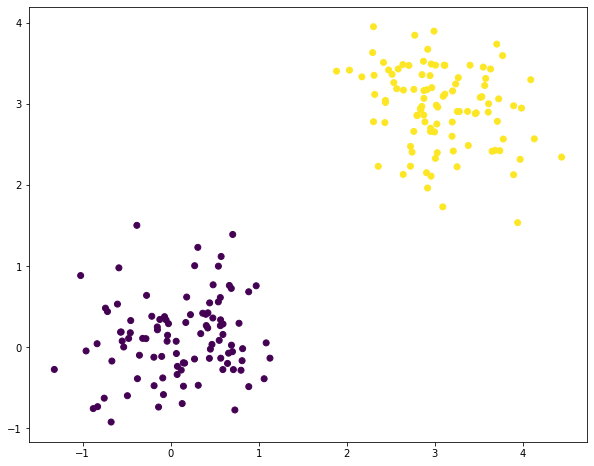

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c = y)

Combinando las dos ecuaciones tenemos:

$$cost(\hat{f}(x),y) = -y\log(\hat{f}(x)) - (1-y)\log(1-\hat{f}(x))$$

Entonces el costo de todos los puntos en los datos reales se puede calcular tomando el promedio del costo de todas las muestras:

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{f}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{f}(x^{(i)}))]$$

In [5]:
def sigmoid(X):
    return 1/(1+np.exp(-X))


In [6]:
def regresor_lineal(beta, X):
    return np.dot(X,beta)


In [7]:
def f_hat_modelo(beta, X):
    return sigmoid(regresor_lineal(beta, X))

In [8]:
def cost_function(beta, X, y):
    m = X.shape[0]
    cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
    return cost

In [9]:
def gradient(beta, X, y):
    m = X.shape[0]
    return (1/m)*np.dot(X.T, sigmoid(regresor_lineal(beta, X)) - y)

### Optimizando con el Gradiente

In [10]:
import scipy.optimize as opt

In [11]:
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize._tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arr

In [12]:
Xa = np.c_[np.ones((X.shape[0],1)), X]
y = y.values.reshape(len(y),1)
Beta = np.zeros((Xa.shape[1],1))

In [13]:
# 1.- Optimización utilizando la librería de scipy
def fit(X,y,beta):
    opt_pesos = opt.fmin_tnc(func = cost_function, x0= beta, fprime = gradient, args=(X, y.flatten()))
    return opt_pesos[0]

In [14]:
beta_sol = fit(Xa, y, Beta)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))


In [15]:
beta_sol

array([-25.11300379,  10.64519903,   5.36891569])

$$f_{reg} = -25.11 + 10.64*x1 + 5.36*x2$$
$$\hat{f} = \sigma(-25.11 + 10.64*x1 + 5.36*x2)$$

$$\hat{f}(x) = \frac{1}{1+e^{-(-25.11 + 10.64*x1 + 5.36*x2)}}$$

In [16]:
def predict(beta, X):
    return f_hat_modelo(beta, X)

In [17]:
np.round(predict(beta_sol, Xa))

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

In [18]:
X['predicción'] = np.round(predict(beta_sol, Xa))
X

,0,1,predicción
0,0.131117,-0.694103,0.0
1,0.567389,0.339034,0.0
2,2.855025,2.971203,1.0
3,0.541739,0.560591,0.0
4,0.073822,-0.335345,0.0
...,...,...,...
195,2.838675,2.946874,1.0
196,0.479348,0.361812,0.0
197,2.032113,3.419321,1.0
198,3.537026,3.091923,1.0


In [19]:
X_new = np.array([[1,1,1],
                  [1,-1,3],
                  [1,4,2]])

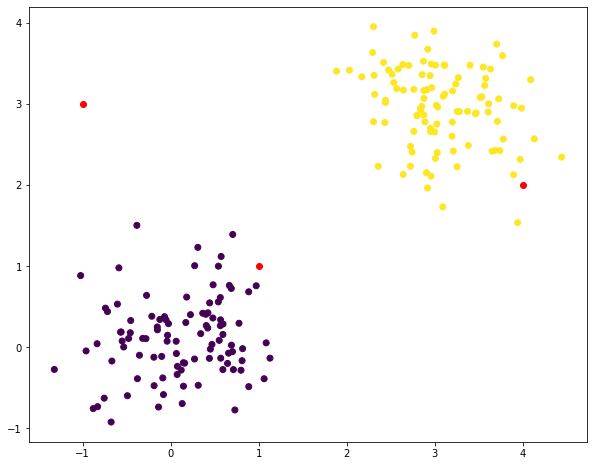

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c = X['predicción'].values)
plt.scatter(X_new[:,1],X_new[:,2], c='r')

In [21]:
y_hat_new_predict = np.round(predict(beta_sol, X_new))
y_hat_new_predict

array([0., 0., 1.])

Como hay dos características en nuestro conjunto de datos, la ecuación lineal se puede representar mediante:

$$\hat{f}(x)=\beta_0 + \beta_1 x_1 + \beta_2 x_2$$

El límite de decisión se puede encontrar estableciendo la suma ponderada de las entradas en 0. Es decir igualar $\hat{f}(x)=0$, entonces:

$$x_2 = - \frac{\beta_0 + \beta_1 x_1}{\beta_2}$$

0

$$x_1 = - \frac{\beta_0 + \beta_2 x_2}{\beta_1}$$

[]

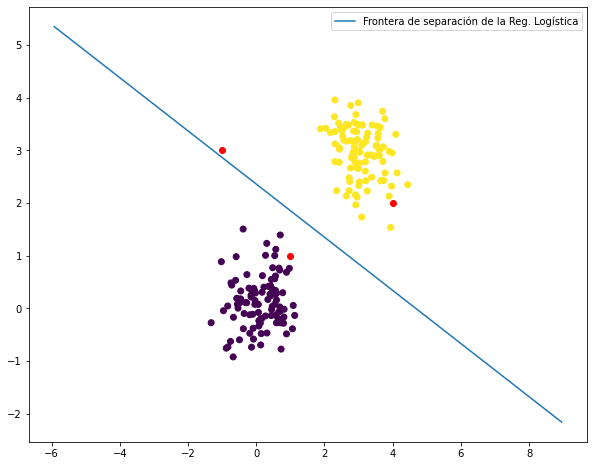

In [22]:
from matplotlib import pyplot as plt
x_values = [np.min(Xa[:,2] - 5), np.max(Xa[:,2] + 5)]
y_values = -(beta_sol[0] + np.dot(beta_sol[2], x_values))/beta_sol[1]

plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c = X['predicción'].values)
plt.scatter(X_new[:,1],X_new[:,2], c='r')
plt.plot(x_values, y_values, label='Frontera de separación de la Reg. Logística')
plt.legend()
plt.plot()

### Con Sklearn

In [23]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(fit_intercept=False)
model.fit(Xa, y.ravel())
predict_class = model.predict(Xa)

Beta_sklearn = model.coef_[0]

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
Beta_sklearn

In [ ]:
x_values = [np.min(Xa[:,2]) -5, np.max(Xa[:,2])+5]
y_values = - (Beta_sklearn[0] + np.dot(Beta_sklearn[2],x_values)) / Beta_sklearn[1]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='frontera de decisión')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
model.coef_.T

## Aplicando PSO

In [25]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys # max float


#particle class
class Particle:
    def __init__(self, fitness, x_points, y_points, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)

        # initialize position of the particle with 0.0 value
        self.position = [0.0 for i in range(dim)]

        # initialize velocity of the particle with 0.0 value
        self.velocity = [0.0 for i in range(dim)]

        # initialize best particle position of the particle with 0.0 value
        self.best_part_pos = [0.0 for i in range(dim)]

        # loop dim times to calculate random position and velocity
        # range of position and velocity is [minx, max]
        for i in range(dim):
            self.position[i] = ((maxx - minx)*self.rnd.random() + minx)
            self.velocity[i] = ((maxx - minx)*self.rnd.random() + minx)

        # compute fitness of particle
        self.fitness = fitness(self.position,x_points, y_points) # curr fitness

        # initialize best position and fitness of this particle
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness # best fitness

    # particle swarm optimization function
    def pso(fitness, x_points, y_points, max_iter, n, dim, minx, maxx):
        # hyper parameters
        w = 3 # inertia
        c1 = 2.3 # cognitive (particle)
        c2 = 2.5 # social (swarm)

        rnd = random.Random(0)

        # create n random particles
        swarm = [Particle(fitness, x_points, y_points, dim, minx, maxx, i) for i in range(n)]

        # compute the value of best_position and best_fitness in swarm
        best_swarm_pos = [0.0 for i in range(dim)]
        best_swarm_fitnessVal = sys.float_info.max # swarm best

        # computer best particle of swarm and it's fitness
        for i in range(n): # check each particle
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)

        # main loop of pso
        Iter = 0
        best_swarm_pos_hist = {}
        best_swarm_fitnessVal_hist = {}
        
        while Iter < max_iter:

            # after every 10 iterations
            # print iteration number and best fitness value so far
            best_swarm_pos_hist[Iter] = best_swarm_pos
            best_swarm_fitnessVal_hist[Iter] = best_swarm_fitnessVal
            if Iter % 10 == 0 and Iter > 1:
                print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
                print(f'best_position: {best_swarm_pos}')

            for i in range(n): # process each particle

                # compute new velocity of curr particle
                for k in range(dim):
                    r1 = rnd.random() # randomizations
                    r2 = rnd.random()

                    swarm[i].velocity[k] = (
                                            (w * swarm[i].velocity[k]) +
                                            (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                                            (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                                        )


                    # if velocity[k] is not in [minx, max]
                    # then clip it
                    if swarm[i].velocity[k] < minx:
                        swarm[i].velocity[k] = minx
                    elif swarm[i].velocity[k] > maxx:
                        swarm[i].velocity[k] = maxx


            # compute new position using new velocity
            for k in range(dim):
                swarm[i].position[k] += swarm[i].velocity[k]

            # compute fitness of new position
            swarm[i].fitness = fitness(swarm[i].position,x_points, y_points)

            # is new position a new best for the particle?
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)

            # is new position a new best overall?
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)

            # for-each particle
            Iter += 1
        #end_while
        return best_swarm_pos, best_swarm_pos_hist, best_swarm_fitnessVal_hist
        # end pso


#----------------------------


In [26]:
def cost_function(beta, X, y):
    m = X.shape[0]
    cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
    return cost

In [27]:
dim = 3
fitness = cost_function

num_particulas = 1000
max_iter = 10000

best_position,best_pos_hist, best_fitnessVal_hist = Particle.pso(fitness, Xa, y, max_iter, num_particulas, dim, -50.0, 50.0)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))


Iter = 10 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 20 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 30 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 40 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 50 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 60 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]


C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/1452116221.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Iter = 70 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 80 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 90 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 100 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 110 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 120 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 130 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 140 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 150 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 160 best fitnes

Iter = 860 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 870 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 880 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 890 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 900 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 910 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 920 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 930 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 940 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 950 best fit

Iter = 1650 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1660 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1670 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1680 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1690 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1700 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1710 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1720 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1730 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 174

Iter = 2410 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2420 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2430 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2440 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2450 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2460 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2470 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2480 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2490 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 250

Iter = 3190 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3200 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3210 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3220 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3230 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3240 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3250 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3260 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3270 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 328

Iter = 3950 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3960 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3970 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3980 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3990 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4000 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4010 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4020 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4030 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 404

Iter = 4700 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4710 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4720 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4730 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4740 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4750 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4760 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4770 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4780 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 479

Iter = 5460 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5470 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5480 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5490 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5500 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5510 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5520 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5530 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5540 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 555

Iter = 6230 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6240 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6250 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6260 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6270 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6280 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6290 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6300 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6310 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 632

Iter = 7020 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7030 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7040 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7050 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7060 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7070 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7080 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7090 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7100 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 711

Iter = 7810 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7820 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7830 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7840 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7850 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7860 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7870 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7880 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7890 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 790

Iter = 8570 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8580 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8590 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8600 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8610 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8620 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8630 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8640 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8650 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 866

Iter = 9370 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9380 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9390 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9400 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9410 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9420 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9430 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9440 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9450 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 946

In [28]:
beta_sol_pso = best_position

[]

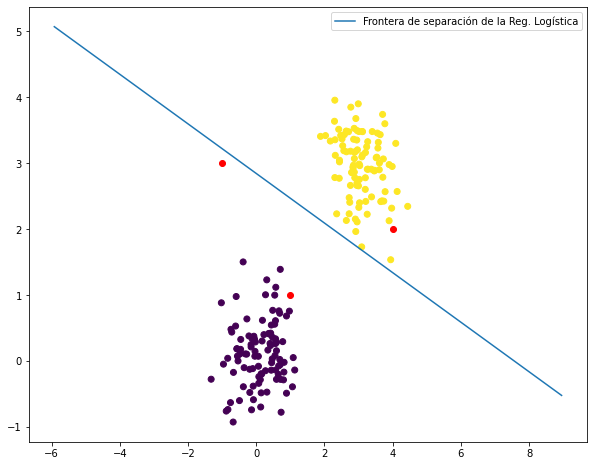

In [29]:
from matplotlib import pyplot as plt
x_values = [np.min(Xa[:,2] - 5), np.max(Xa[:,2] + 5)]
y_values = -(beta_sol_pso[0] + np.dot(beta_sol_pso[2], x_values))/beta_sol_pso[1]

plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c = X['predicción'].values)
plt.scatter(X_new[:,1],X_new[:,2], c='r')
plt.plot(x_values, y_values, label='Frontera de separación de la Reg. Logística')
plt.legend()
plt.plot()

In [30]:
from evolutivos import Particula as PSO

In [31]:
best_position,best_pos_hist, best_fitnessVal_hist = PSO.pso(fitness, Xa, y, max_iter, num_particulas, dim, -50.0, 50.0)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/3504845967.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(f_hat_modelo(beta,X)) + (1-y)*np.log(1 - f_hat_modelo(beta,X)))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_6764/1452116221.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Iteración= 10, mejor_fitness 593.674401251834
Mejor Posición = [-4.6742984597039765, 5.876653098191213, -2.101888249005043]
Iteración= 20, mejor_fitness 514.0724041023705
Mejor Posición = [-5.017065628938511, 0.08146149460668539, 3.4871313766213774]
Iteración= 30, mejor_fitness 514.0724041023705
Mejor Posición = [-5.017065628938511, 0.08146149460668539, 3.4871313766213774]
Iteración= 40, mejor_fitness 445.4738189595615
Mejor Posición = [-5.555831733940408, -0.5157425726721101, 3.5614603146039627]
Iteración= 50, mejor_fitness 445.4738189595615
Mejor Posición = [-5.555831733940408, -0.5157425726721101, 3.5614603146039627]
Iteración= 60, mejor_fitness 445.4738189595615
Mejor Posición = [-5.555831733940408, -0.5157425726721101, 3.5614603146039627]
Iteración= 70, mejor_fitness 445.4738189595615
Mejor Posición = [-5.555831733940408, -0.5157425726721101, 3.5614603146039627]
Iteración= 80, mejor_fitness 338.274304706631
Mejor Posición = [-3.9452040644397712, -0.12424431689326809, 2.39355206750

Iteración= 660, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 670, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 680, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 690, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 700, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 710, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 720, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.31181600164200063, 0.3568567063841783]
Iteración= 730, mejor_fitness 213.28633862236686
Mejor Posición = [0.5934049690331591, 0.311816001642000

Iteración= 1300, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1310, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1320, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1330, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1340, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1350, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1360, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.6576135083374766, 0.9002523949685752]
Iteración= 1370, mejor_fitness 177.76573464300822
Mejor Posición = [0.8097186916823915, -0.657613

Iteración= 1940, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 1950, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 1960, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 1970, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 1980, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 1990, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2000, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2010, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904

Iteración= 2580, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2590, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2600, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2610, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2620, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2630, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2640, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904915466955, -0.9418948786644208]
Iteración= 2650, mejor_fitness 156.04207000412856
Mejor Posición = [0.9011736053700616, 0.4716904

Iteración= 3220, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3230, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3240, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3250, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3260, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3270, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3280, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3290, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 3870, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3880, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3890, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3900, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3910, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3920, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3930, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 3940, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 4520, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4530, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4540, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4550, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4560, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4570, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4580, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 4590, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 5170, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5180, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5190, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5200, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5210, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5220, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5230, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5240, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 5820, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5830, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5840, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5850, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5860, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5870, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5880, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 5890, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 6470, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6480, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6490, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6500, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6510, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6520, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6530, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 6540, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 7120, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7130, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7140, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7150, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7160, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7170, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7180, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7190, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 7770, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7780, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7790, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7800, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7810, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7820, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7830, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 7840, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 8420, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8430, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8440, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8450, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8460, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8470, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8480, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 8490, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 9070, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9080, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9090, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9100, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9110, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9120, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9130, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454956, 0.766362612827109]
Iteración= 9140, mejor_fitness 152.75653303231968
Mejor Posición = [-0.445504841096394, -0.7869872960454

Iteración= 9710, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9720, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9730, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9740, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9750, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9760, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9770, mejor_fitness 140.07229332750785
Mejor Posición = [-0.004535242651385829, -0.2187756734191737, 0.2981160147903239]
Iteración= 9780, mejor_fitness 140.07229332750785
Mejor Posición = [-0.00453

In [35]:
beta_sol_pso2 = np.array(best_position)

In [36]:
beta_sol_pso2

array([-0.00453524, -0.21877567,  0.29811601])

[]

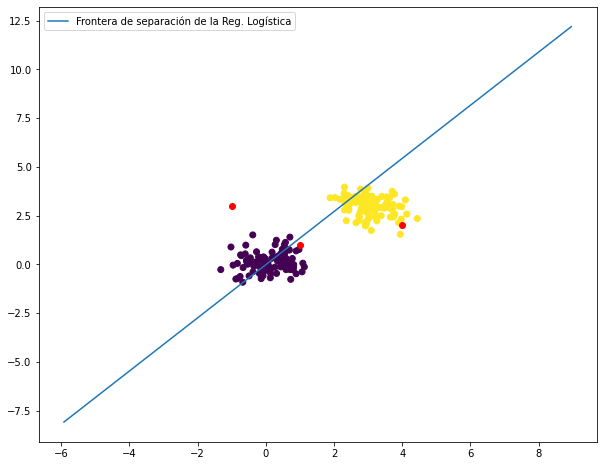

In [37]:
from matplotlib import pyplot as plt
x_values = [np.min(Xa[:,2] - 5), np.max(Xa[:,2] + 5)]
y_values = -(beta_sol_pso2[0] + np.dot(beta_sol_pso2[2], x_values))/beta_sol_pso2[1]

plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c = X['predicción'].values)
plt.scatter(X_new[:,1],X_new[:,2], c='r')
plt.plot(x_values, y_values, label='Frontera de separación de la Reg. Logística')
plt.legend()
plt.plot()